In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import seaborn as seabornInstance 
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 

In [2]:
data=pd.read_csv('VAR_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.32046020061592506
           A         B         C        D
0   0.035911  0.045538  45.32733  0.31478
1   0.048223  0.039569  44.51848  0.07224
2   0.404977  0.606289  44.32612  0.01430
3   0.025107  0.033440  44.69770  0.00526
4   0.089001  0.134069  44.30242  0.01505
..       ...       ...       ...      ...
65  0.122797  0.167878  44.54921  0.06313
66  0.028120  0.031794  44.65970  0.01427
67  0.021182  0.034424  44.79900  0.00287
68  0.042017  0.033025  44.18964  0.16066
69  0.019305  0.023255  44.25669  0.01856

[70 rows x 4 columns]


In [3]:
data.describe()

,A,B,C,D
count,70.000000,70.000000,70.000000,70.000000
mean,0.062496,0.070810,44.590745,0.052744
std,0.067148,0.087261,0.320460,0.057575
min,0.011392,0.005167,44.084260,0.001460
25%,0.024961,0.025120,44.327403,0.014015
50%,0.037594,0.043825,44.559770,0.029930
75%,0.074528,0.079969,44.795455,0.066477
max,0.404977,0.606289,45.679790,0.314780


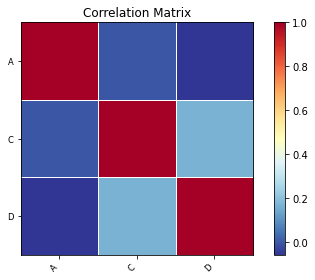

In [4]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.0006477085669187214
intercepción b0 is 0.0913775295147059


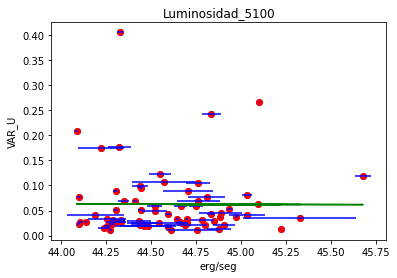

In [5]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('VAR_U')
plt.savefig("Luminosidad_5100_VAR_U.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

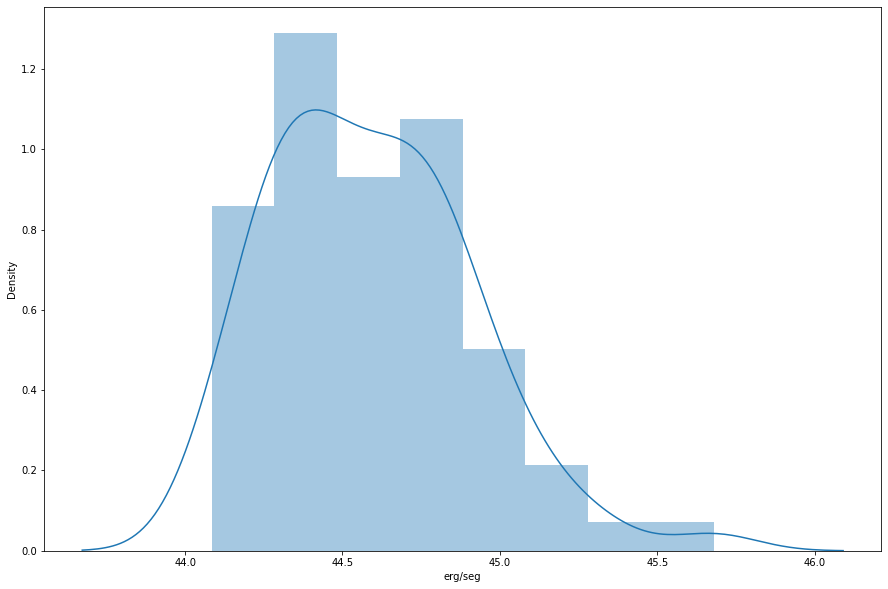

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [7]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-6.47708567e-04]
 [-4.26919076e-03]
 [ 1.00000000e+00]]
Intercepción: [0.09137753 0.26117593 0.        ]
Errorcuadratico medio : 0.003982702427025232
Raiz del error cuadratico medio:  0.06310865572189946
 Coeficiente de determinacion R2 :  0.33341845594210157


In [8]:
data=pd.read_csv('VAR_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3149958895049263
           A         B         C        D
0   0.013527  0.008661  45.32733  0.31478
1   0.017699  0.009798  44.51848  0.07224
2   0.243050  0.294363  44.32612  0.01430
3   0.016140  0.023448  44.69770  0.00526
4   0.027366  0.014149  44.30242  0.01505
..       ...       ...       ...      ...
76  0.106895  0.091779  44.36424  0.00708
77  0.018196  0.016266  44.17580  0.04911
78  0.031760  0.043204  44.40151  0.00523
79  0.038302  0.025455  44.20654  0.02390
80  0.008960  0.011796  44.59746  0.00671

[81 rows x 4 columns]


In [9]:
data.describe()

,A,B,C,D
count,81.000000,81.000000,81.000000,81.000000
mean,0.038665,0.035941,44.586938,0.053720
std,0.039413,0.041988,0.314996,0.057689
min,0.007028,0.003570,44.084260,0.001460
25%,0.013527,0.011220,44.331250,0.013930
50%,0.027450,0.024011,44.560430,0.032770
75%,0.044330,0.042830,44.784820,0.072240
max,0.243050,0.294363,45.679790,0.314780


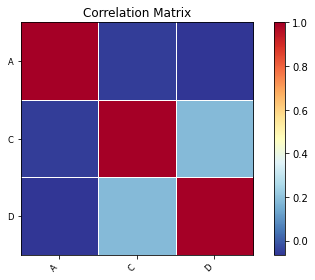

In [10]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.006251625143293319
intercepción b0 is 0.31740628375960767


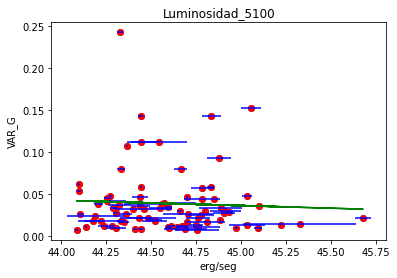

In [11]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('VAR_G')
plt.savefig("Luminosidad_5100_VAR_G.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

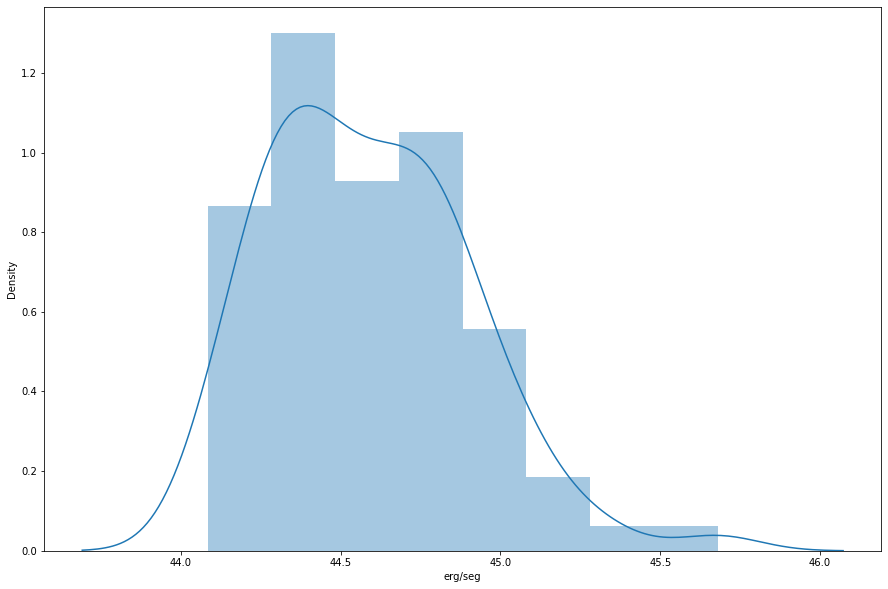

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [13]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.00625163]
 [-0.00386078]
 [ 1.        ]]
Intercepción: [3.17406284e-01 2.08081125e-01 1.42108547e-14]
Errorcuadratico medio : 0.0010900464163385419
Raiz del error cuadratico medio:  0.033015850986133036
 Coeficiente de determinacion R2 :  0.33444509745506484


In [14]:
data=pd.read_csv('VAR_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3123274552395519
           A         B         C        D
0   0.011296  0.011861  45.32733  0.31478
1   0.022475  0.012813  44.51848  0.07224
2   0.206401  0.269515  44.32612  0.01430
3   0.013742  0.017776  44.69770  0.00526
4   0.032052  0.041231  44.30242  0.01505
..       ...       ...       ...      ...
80  0.106862  0.096957  44.59746  0.00671
81  0.017548  0.018414  44.17015  0.06091
82  0.028546  0.034991  44.31297  0.01773
83  0.045649  0.028855  44.52867  0.01500
84  0.008369  0.007792  44.68251  0.01940

[85 rows x 4 columns]


In [16]:
data.describe()

,A,B,C,D
count,85.000000,85.000000,85.000000,85.000000
mean,0.035925,0.038257,44.579250,0.052522
std,0.045465,0.052992,0.312327,0.056710
min,0.004955,0.004043,44.084260,0.001460
25%,0.011900,0.011861,44.326120,0.014270
50%,0.022262,0.020539,44.549210,0.031930
75%,0.036782,0.042253,44.781450,0.066890
max,0.253407,0.310591,45.679790,0.314780


pendiente b1  -0.015604699143219164
intercepción b0 is 0.7315708844715595


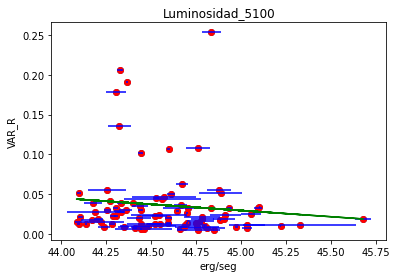

In [17]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('VAR_R')
plt.savefig("Luminosidad_5100_VAR_R.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

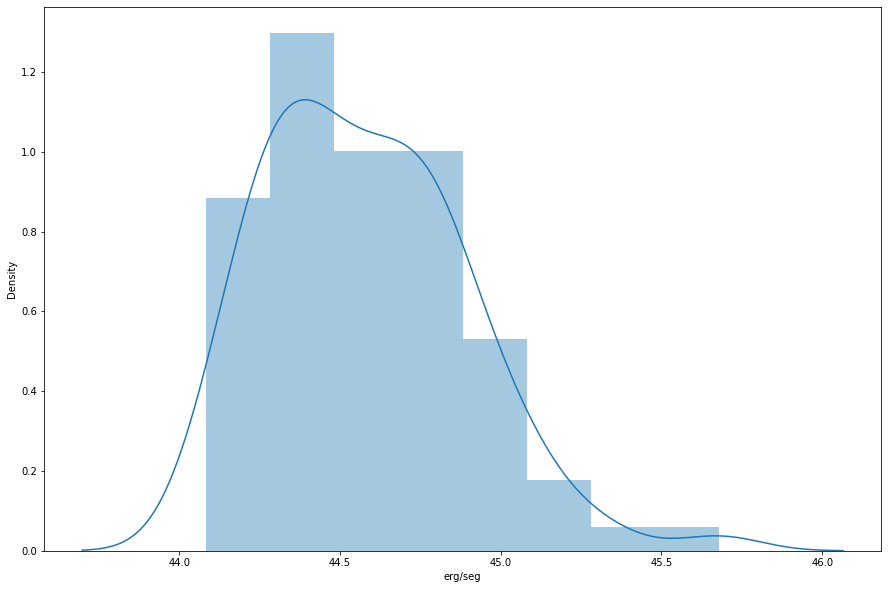

In [18]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [19]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.0156047 ]
 [-0.01509573]
 [ 1.        ]]
Intercepción: [ 7.31570884e-01  7.11213394e-01 -2.13162821e-14]
Errorcuadratico medio : 0.0015907998221102544
Raiz del error cuadratico medio:  0.039884831980469146
 Coeficiente de determinacion R2 :  0.3398025434492455


In [20]:
data=pd.read_csv('VAR_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.31399638095223986
           A         B         C        D
0   0.006402  0.004100  45.32733  0.31478
1   0.015817  0.009129  44.51848  0.07224
2   0.221103  0.283365  44.32612  0.01430
3   0.008726  0.008751  44.69770  0.00526
4   0.012007  0.007486  44.30242  0.01505
..       ...       ...       ...      ...
79  0.071000  0.105262  44.20654  0.02390
80  0.017609  0.021547  44.59746  0.00671
81  0.015826  0.008261  44.17015  0.06091
82  0.030691  0.018299  44.31297  0.01773
83  0.005740  0.004063  44.52867  0.01500

[84 rows x 4 columns]


In [21]:
data.describe()

,A,B,C,D
count,84.000000,84.000000,84.000000,84.000000
mean,0.027596,0.031264,44.578021,0.052916
std,0.036559,0.048352,0.313996,0.056933
min,0.002800,0.002445,44.084260,0.001460
25%,0.010541,0.007663,44.325268,0.014185
50%,0.015705,0.015612,44.545520,0.032350
75%,0.027885,0.028270,44.782292,0.068227
max,0.221103,0.283365,45.679790,0.314780


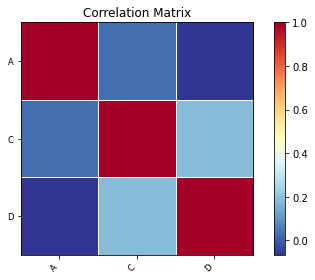

In [22]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.003579760701316875
intercepción b0 is -0.13198298078209553


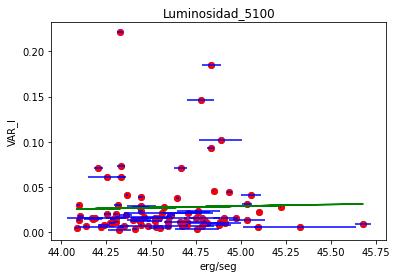

In [23]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('VAR_I')
plt.savefig("Luminosidad_5100_VAR_I.pdf")

In [24]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.00357976]
 [0.00773643]
 [1.        ]]
Intercepción: [-0.13198298 -0.31361075  0.        ]
Errorcuadratico medio : 0.0012078759356602767
Raiz del error cuadratico medio:  0.034754509573007596
 Coeficiente de determinacion R2 :  0.33448979779735616


In [25]:
data=pd.read_csv('VAR_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3149958895049263
           A         B         C        D
0   0.002346  0.003401  45.32733  0.31478
1   0.020644  0.034743  44.51848  0.07224
2   0.141805  0.206988  44.32612  0.01430
3   0.004277  0.006090  44.69770  0.00526
4   0.005045  0.005110  44.30242  0.01505
..       ...       ...       ...      ...
76  0.092146  0.118662  44.36424  0.00708
77  0.019275  0.020649  44.17580  0.04911
78  0.025293  0.029845  44.40151  0.00523
79  0.024045  0.024407  44.20654  0.02390
80  0.000976  0.003682  44.59746  0.00671

[81 rows x 4 columns]


In [26]:
data.describe()

,A,B,C,D
count,81.000000,81.000000,81.000000,81.000000
mean,0.019631,0.027056,44.586938,0.053720
std,0.024320,0.034032,0.314996,0.057689
min,0.000976,0.003401,44.084260,0.001460
25%,0.007250,0.009063,44.331250,0.013930
50%,0.012320,0.018435,44.560430,0.032770
75%,0.020644,0.029635,44.784820,0.072240
max,0.141805,0.206988,45.679790,0.314780


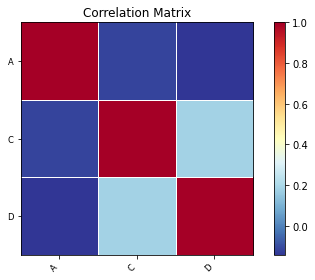

In [27]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.008712984020988666
intercepción b0 is 0.40811625303016075


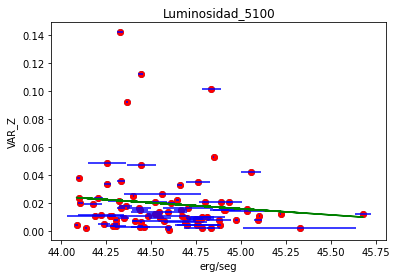

In [28]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('VAR_Z')
plt.savefig("Luminosidad_5100_VAR_Z.pdf")

In [29]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.00871298]
 [-0.00960995]
 [ 1.        ]]
Intercepción: [4.08116253e-01 4.55534223e-01 1.42108547e-14]
Errorcuadratico medio : 0.000570523854745806
Raiz del error cuadratico medio:  0.023885641183476865
 Coeficiente de determinacion R2 :  0.34021569554400305
